In [84]:
# the purpose of this notebook is to perform a regression analysis on the market data 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# read in the data
strength_tincture_market = pd.read_csv("..\\data\\strength_tincture_market.csv")
mind_tincture_market = pd.read_csv("..\\data\\mind_tincture_market.csv")
vitality_tincture_market = pd.read_csv("..\\data\\vitality_tincture_market.csv")
dexterity_tincture_market = pd.read_csv("..\\data\\dexterity_tincture_market.csv")
intelligence_tincture_market = pd.read_csv("..\\data\\intelligence_tincture_market.csv")

In [85]:
strength_tincture_market


,hq,pricePerUnit,quantity,buyerName,onMannequin,timestamp,worldName,worldID,Name,itemID,year,month,day,hour,minute,second,day_of_week,week_of_year
0,True,2989,47,Edit Undeux,False,2024-03-20 17:28:45,Faerie,54,Grade 8 Tincture of Strength,39727,2024,3,20,17,28,45,Wednesday,12
1,True,2714,99,Mythological Dream,False,2024-03-20 17:27:55,Gilgamesh,63,Grade 8 Tincture of Strength,39727,2024,3,20,17,27,55,Wednesday,12
2,True,2714,99,Mythological Dream,False,2024-03-20 17:27:53,Gilgamesh,63,Grade 8 Tincture of Strength,39727,2024,3,20,17,27,53,Wednesday,12
3,True,2714,99,Mythological Dream,False,2024-03-20 17:27:52,Gilgamesh,63,Grade 8 Tincture of Strength,39727,2024,3,20,17,27,52,Wednesday,12
4,True,2700,99,Bib Kek,False,2024-03-20 17:11:23,Gilgamesh,63,Grade 8 Tincture of Strength,39727,2024,3,20,17,11,23,Wednesday,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173295,True,25000,10,Gwyn Graves,False,2023-05-23 13:53:16,Gilgamesh,63,Grade 8 Tincture of Strength,39727,2023,5,23,13,53,16,Tuesday,21
173296,True,25000,50,Gwyn Graves,False,2023-05-23 13:53:15,Gilgamesh,63,Grade 8 Tincture of Strength,39727,2023,5,23,13,53,15,Tuesday,21
173297,False,6969,3,Xeno Izanagi,False,2023-05-23 12:39:47,Gilgamesh,63,Grade 8 Tincture of Strength,39727,2023,5,23,12,39,47,Tuesday,21
173298,True,19997,15,Sonya Windwalker,False,2023-05-23 11:50:44,Gilgamesh,63,Grade 8 Tincture of Strength,39727,2023,5,23,11,50,44,Tuesday,21


In [142]:
mind_tincture_market

,hq,pricePerUnit,quantity,buyerName,onMannequin,timestamp,worldName,worldID,Name,itemID,...,day,hour,minute,second,day_of_week,week_of_year,totalPrice,z_score,outlier,forecast
0,1,2837,50,Leandros Adastros,False,2024-03-20 11:32:32,Adamantoise,73,Grade 8 Tincture of Mind,39731,...,20,11,32,32,2,12,141850,-0.181605,False,2923.529588
1,1,3089,99,Ren Ryder,False,2024-03-20 08:55:08,Faerie,54,Grade 8 Tincture of Mind,39731,...,20,8,55,8,2,12,305811,-0.120518,False,2755.281684
2,1,2672,99,Camellia Yagami,False,2024-03-20 07:01:38,Gilgamesh,63,Grade 8 Tincture of Mind,39731,...,20,7,1,38,2,12,264528,-0.221602,False,2256.430435
3,1,2672,99,Camellia Yagami,False,2024-03-20 07:01:37,Gilgamesh,63,Grade 8 Tincture of Mind,39731,...,20,7,1,37,2,12,264528,-0.221602,False,2256.430435
4,1,2672,99,Camellia Yagami,False,2024-03-20 07:01:36,Gilgamesh,63,Grade 8 Tincture of Mind,39731,...,20,7,1,36,2,12,264528,-0.221602,False,2256.430435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73998,1,12000,40,Perish Kazuto,False,2023-05-23 16:34:07,Gilgamesh,63,Grade 8 Tincture of Mind,39731,...,23,16,34,7,1,21,480000,2.039592,False,8316.818140
73999,1,12000,40,Perish Kazuto,False,2023-05-23 16:34:06,Gilgamesh,63,Grade 8 Tincture of Mind,39731,...,23,16,34,6,1,21,480000,2.039592,False,8316.818140
74000,1,13800,48,Camellia Yagami,False,2023-05-23 15:08:03,Jenova,40,Grade 8 Tincture of Mind,39731,...,23,15,8,3,1,21,662400,2.475928,False,10166.912078
74003,1,13000,27,Halo Nya,False,2023-05-23 13:55:49,Jenova,40,Grade 8 Tincture of Mind,39731,...,23,13,55,49,1,21,351000,2.282001,False,7327.075226


In [143]:
dexterity_tincture_market

,hq,pricePerUnit,quantity,buyerName,onMannequin,timestamp,worldName,worldID,Name,itemID,...,day,hour,minute,second,day_of_week,week_of_year,totalPrice,z_score,outlier,forecast
0,1,2862,33,Dark Phenex,False,2024-03-20 17:40:40,Adamantoise,73,Grade 8 Tincture of Dexterity,39728,...,20,17,40,40,2,12,94446,-0.276061,False,3001.439109
1,1,2862,33,Dark Phenex,False,2024-03-20 17:40:37,Adamantoise,73,Grade 8 Tincture of Dexterity,39728,...,20,17,40,37,2,12,94446,-0.276061,False,3001.439109
2,1,2788,99,Lobotomy Victim,False,2024-03-20 16:57:28,Midgardsormr,65,Grade 8 Tincture of Dexterity,39728,...,20,16,57,28,2,12,276012,-0.311534,False,2537.006007
3,1,2787,99,Lobotomy Victim,False,2024-03-20 16:57:26,Midgardsormr,65,Grade 8 Tincture of Dexterity,39728,...,20,16,57,26,2,12,275913,-0.312014,False,2535.851422
4,1,2863,51,Lune Cr'est,False,2024-03-20 16:39:34,Adamantoise,73,Grade 8 Tincture of Dexterity,39728,...,20,16,39,34,2,12,146013,-0.275581,False,2898.099394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75690,0,3500,6,Nino Nakano,False,2023-05-25 20:41:15,Faerie,54,Grade 8 Tincture of Dexterity,39728,...,25,20,41,15,3,21,21000,0.029780,False,2840.808954
75812,0,7500,6,Aurelion Faelbane,False,2023-05-25 05:18:08,Midgardsormr,65,Grade 8 Tincture of Dexterity,39728,...,25,5,18,8,3,21,45000,1.947278,False,3108.899382
76042,0,5000,15,Jen' Jen',False,2023-05-24 05:36:46,Jenova,40,Grade 8 Tincture of Dexterity,39728,...,24,5,36,46,2,21,75000,0.748842,False,3109.072371
76043,0,5000,15,Jen' Jen',False,2023-05-24 05:36:11,Jenova,40,Grade 8 Tincture of Dexterity,39728,...,24,5,36,11,2,21,75000,0.748842,False,3109.072371


In [144]:
intelligence_tincture_market

,hq,pricePerUnit,quantity,buyerName,onMannequin,timestamp,worldName,worldID,Name,itemID,...,day,hour,minute,second,day_of_week,week_of_year,totalPrice,z_score,outlier,forecast
0,1,2823,25,Glacial Storm,False,2024-03-20 17:04:18,Midgardsormr,65,Grade 8 Tincture of Intelligence,39730,...,20,17,4,18,2,12,70575,-0.273661,False,3015.691547
1,1,2823,25,Coconut Melk,False,2024-03-20 16:22:20,Midgardsormr,65,Grade 8 Tincture of Intelligence,39730,...,20,16,22,20,2,12,70575,-0.273661,False,3014.865229
2,0,2000,3,Deimos Drackin,False,2024-03-20 15:36:20,Gilgamesh,63,Grade 8 Tincture of Intelligence,39730,...,20,15,36,20,2,12,6000,-0.680739,False,1878.084148
3,0,2997,15,Deimos Drackin,False,2024-03-20 15:36:04,Gilgamesh,63,Grade 8 Tincture of Intelligence,39730,...,20,15,36,4,2,12,44955,-0.187596,False,1867.865611
4,1,2823,25,Faeron Evergleam,False,2024-03-20 15:13:57,Midgardsormr,65,Grade 8 Tincture of Intelligence,39730,...,20,15,13,57,2,12,70575,-0.273661,False,3014.038910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65562,0,1299,3,Clea Allis,False,2023-05-26 07:52:06,Siren,57,Grade 8 Tincture of Intelligence,39730,...,26,7,52,6,4,21,3897,-1.027472,False,2492.677846
65563,0,1300,9,Clea Allis,False,2023-05-26 07:52:05,Siren,57,Grade 8 Tincture of Intelligence,39730,...,26,7,52,5,4,21,11700,-1.026977,False,2353.493291
65681,0,4094,3,Haru Kurogane,False,2023-05-26 00:24:17,Gilgamesh,63,Grade 8 Tincture of Intelligence,39730,...,26,0,24,17,4,21,12282,0.355009,False,2583.190785
65682,0,4094,3,Haru Kurogane,False,2023-05-26 00:24:15,Gilgamesh,63,Grade 8 Tincture of Intelligence,39730,...,26,0,24,15,4,21,12282,0.355009,False,2583.190785


In [145]:
vitality_tincture_market

,hq,pricePerUnit,quantity,buyerName,onMannequin,timestamp,worldName,worldID,Name,itemID,...,day,hour,minute,second,day_of_week,week_of_year,totalPrice,z_score,outlier,forecast
0,1,2974,20,Reina Uberall,False,2024-03-17 23:06:14,Gilgamesh,63,Grade 8 Tincture of Vitality,39729,...,17,23,6,14,6,11,59480,-0.269824,False,2983.185476
1,1,1850,30,Elsha Linnette,False,2024-03-14 12:58:43,Midgardsormr,65,Grade 8 Tincture of Vitality,39729,...,14,12,58,43,3,11,55500,-0.533212,False,1989.106775
2,1,2996,24,Samara Hana,False,2024-03-14 12:17:15,Adamantoise,73,Grade 8 Tincture of Vitality,39729,...,14,12,17,15,3,11,71904,-0.264668,False,2880.129902
3,1,2997,99,Samara Hana,False,2024-03-14 12:17:14,Adamantoise,73,Grade 8 Tincture of Vitality,39729,...,14,12,17,14,3,11,296703,-0.264434,False,2155.510150
4,1,2000,33,Sair Hyskaris,False,2024-03-13 16:39:09,Gilgamesh,63,Grade 8 Tincture of Vitality,39729,...,13,16,39,9,2,11,66000,-0.498062,False,1904.464694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,1,5000,12,Azra Sunna,False,2023-05-24 23:51:19,Cactuar,79,Grade 8 Tincture of Vitality,39729,...,24,23,51,19,2,21,60000,0.204931,False,4680.391817
789,1,500,12,Swole Daddy,False,2023-05-24 22:06:02,Gilgamesh,63,Grade 8 Tincture of Vitality,39729,...,24,22,6,2,2,21,6000,-0.849558,False,3380.998589
791,1,6000,3,Kyro Tachikake,False,2023-05-24 03:08:11,Jenova,40,Grade 8 Tincture of Vitality,39729,...,24,3,8,11,2,21,18000,0.439262,False,4578.713862
792,1,5105,3,Ilyesen Valenroix,False,2023-05-24 00:33:49,Cactuar,79,Grade 8 Tincture of Vitality,39729,...,24,0,33,49,2,21,15315,0.229536,False,4539.968706


In [86]:
strength_tincture_market.columns

Index(['hq', 'pricePerUnit', 'quantity', 'buyerName', 'onMannequin',
       'timestamp', 'worldName', 'worldID', 'Name', 'itemID', 'year', 'month',
       'day', 'hour', 'minute', 'second', 'day_of_week', 'week_of_year'],
      dtype='object')

In [87]:
# We need to calculate the total price for each sale by multiplying the pricePerUnit by the quantity
strength_tincture_market["totalPrice"] = strength_tincture_market["pricePerUnit"] * strength_tincture_market["quantity"]
mind_tincture_market["totalPrice"] = mind_tincture_market["pricePerUnit"] * mind_tincture_market["quantity"]
vitality_tincture_market["totalPrice"] = vitality_tincture_market["pricePerUnit"] * vitality_tincture_market["quantity"]
dexterity_tincture_market["totalPrice"] = dexterity_tincture_market["pricePerUnit"] * dexterity_tincture_market["quantity"]
intelligence_tincture_market["totalPrice"] = intelligence_tincture_market["pricePerUnit"] * intelligence_tincture_market["quantity"]

# We will use this as a feature in our regression analysis

In [88]:
# We will pull features from the market data to use in our regression analysis
# We will use the following features:
# - quantity
# - totalPrice
# - timestamp
# - hq (high quality)(boolean value)- we will convert this to a binary value

# We will use the following target:
# - pricePerUnit

# We will use the following models:
# - Linear Regression
# - Random Forest Regression
# - Gradient Boosting Regression

# We will use the following metrics to evaluate our models:
# - Mean Squared Error
# - R^2

# We will use the following libraries:
# - pandas
# - numpy
# - matplotlib
# - seaborn
# - statsmodels
# - sklearn

# We will use the following steps:
# - Data Cleaning
# - Data Exploration
# - Data Preprocessing
# - Model Building
# - Model Evaluation

# Data Cleaning
# - Check for missing values
# - Check for duplicate values
# - Check for outliers
# - Check for data types

# Data Exploration
# - Check for distribution of data
# - Check for correlation between features
# - Check for multicollinearity
# - Check for interaction effects


In [89]:
# Data Cleaning
# - Check for missing values

strength_tincture_market.isnull().sum()
mind_tincture_market.isnull().sum()
vitality_tincture_market.isnull().sum()
dexterity_tincture_market.isnull().sum()
intelligence_tincture_market.isnull().sum()

hq              0
pricePerUnit    0
quantity        0
buyerName       0
onMannequin     0
timestamp       0
worldName       0
worldID         0
Name            0
itemID          0
year            0
month           0
day             0
hour            0
minute          0
second          0
day_of_week     0
week_of_year    0
totalPrice      0
dtype: int64

In [90]:
# There are no missing values in the data
# Check for duplicate values

strength_tincture_market.duplicated().sum()
mind_tincture_market.duplicated().sum()
vitality_tincture_market.duplicated().sum()
dexterity_tincture_market.duplicated().sum()
intelligence_tincture_market.duplicated().sum()


0

In [91]:
# There are no duplicate values in the data
# Check for outliers
# We will use the z-score to check for outliers
# We will calculate the z-score for the pricePerUnit column in the data
# We will consider any z-score greater than 3 to be an outlier

strength_tincture_market["z_score"] = (strength_tincture_market["pricePerUnit"] - strength_tincture_market["pricePerUnit"].mean()) / strength_tincture_market["pricePerUnit"].std()
mind_tincture_market["z_score"] = (mind_tincture_market["pricePerUnit"] - mind_tincture_market["pricePerUnit"].mean()) / mind_tincture_market["pricePerUnit"].std()
vitality_tincture_market["z_score"] = (vitality_tincture_market["pricePerUnit"] - vitality_tincture_market["pricePerUnit"].mean()) / vitality_tincture_market["pricePerUnit"].std()
dexterity_tincture_market["z_score"] = (dexterity_tincture_market["pricePerUnit"] - dexterity_tincture_market["pricePerUnit"].mean()) / dexterity_tincture_market["pricePerUnit"].std()
intelligence_tincture_market["z_score"] = (intelligence_tincture_market["pricePerUnit"] - intelligence_tincture_market["pricePerUnit"].mean()) / intelligence_tincture_market["pricePerUnit"].std()

strength_tincture_market["outlier"] = strength_tincture_market["z_score"] > 3
mind_tincture_market["outlier"] = mind_tincture_market["z_score"] > 3
vitality_tincture_market["outlier"] = vitality_tincture_market["z_score"] > 3
dexterity_tincture_market["outlier"] = dexterity_tincture_market["z_score"] > 3
intelligence_tincture_market["outlier"] = intelligence_tincture_market["z_score"] > 3

strength_tincture_market["outlier"].sum()
mind_tincture_market["outlier"].sum()
vitality_tincture_market["outlier"].sum()
dexterity_tincture_market["outlier"].sum()
intelligence_tincture_market["outlier"].sum()



1063

In [92]:
strength_tincture_market["outlier"].sum() # = 1

# There is 1 outlier in the strength tincture market data
# remove the outlier from the data
strength_tincture_market = strength_tincture_market[strength_tincture_market["outlier"] == False]


In [93]:
mind_tincture_market["outlier"].sum() # = 282

# There are 282 outliers in the mind tincture market data
# remove the outliers from the data
mind_tincture_market = mind_tincture_market[mind_tincture_market["outlier"] == False]

In [94]:
vitality_tincture_market["outlier"].sum() # = 25

# There are 25 outliers in the vitality tincture market data
# remove the outliers from the data
vitality_tincture_market = vitality_tincture_market[vitality_tincture_market["outlier"] == False]

In [95]:
dexterity_tincture_market["outlier"].sum()# = 1473

# There are 1473 outliers in the dexterity tincture market data
# remove the outliers from the data
dexterity_tincture_market = dexterity_tincture_market[dexterity_tincture_market["outlier"] == False]

In [96]:
intelligence_tincture_market["outlier"].sum()# = 1063

# There are 1063 outliers in the intelligence tincture market data
# remove the outliers from the data
intelligence_tincture_market = intelligence_tincture_market[intelligence_tincture_market["outlier"] == False]

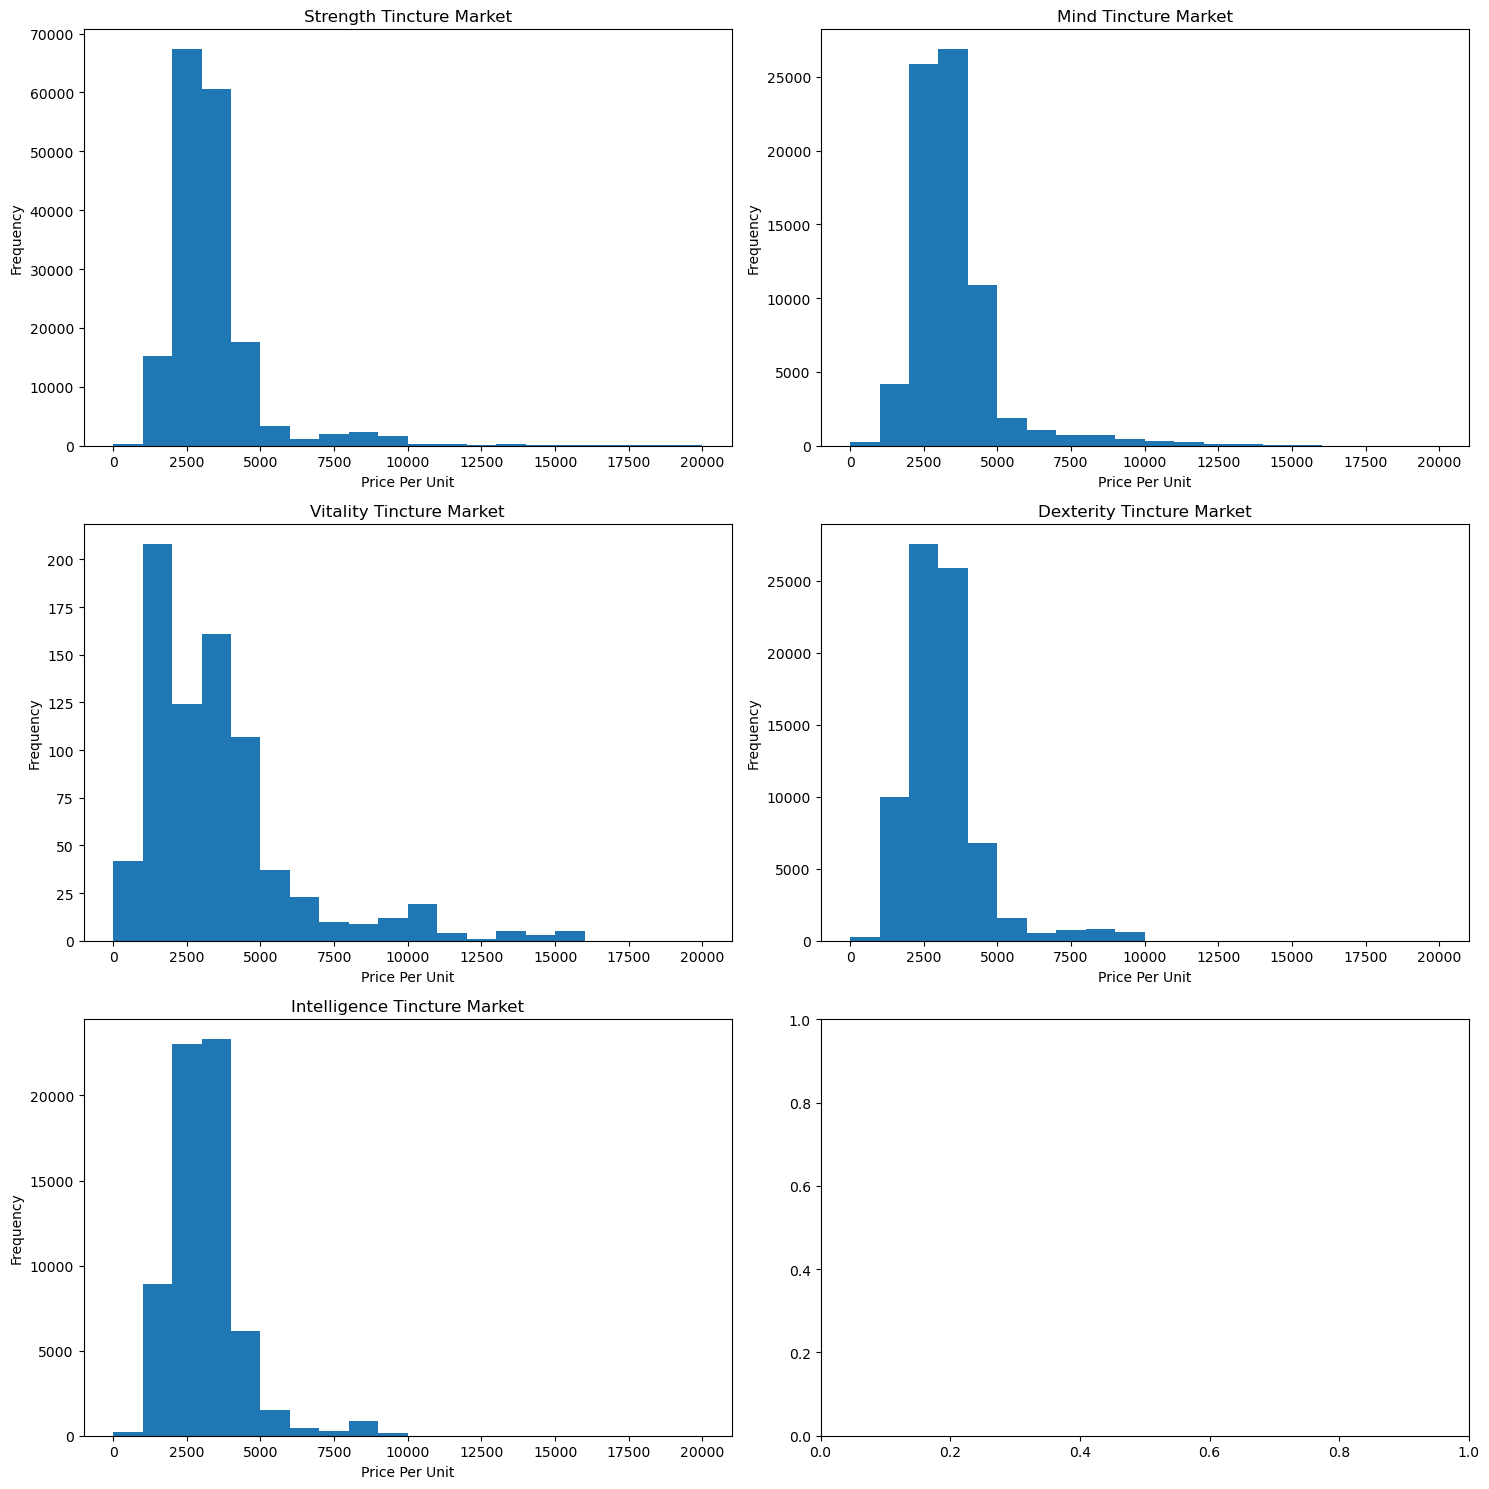

In [97]:
# Data Exploration
# Check for distribution of data
# We will plot histograms of the features in the data

# Let's create a figure with 5 subplots to show the distribution of the pricePerUnit feature for all the markets
fig, axs = plt.subplots(3, 2, figsize = (15, 15))

axs[0, 0].hist(strength_tincture_market["pricePerUnit"], bins = 20, range = (0, 20000))
axs[0, 0].set_title("Strength Tincture Market")
axs[0, 0].set_xlabel("Price Per Unit")
axs[0, 0].set_ylabel("Frequency")

axs[0, 1].hist(mind_tincture_market["pricePerUnit"], bins = 20, range = (0, 20000))
axs[0, 1].set_title("Mind Tincture Market")
axs[0, 1].set_xlabel("Price Per Unit")
axs[0, 1].set_ylabel("Frequency")

axs[1, 0].hist(vitality_tincture_market["pricePerUnit"], bins = 20, range = (0, 20000))
axs[1, 0].set_title("Vitality Tincture Market")
axs[1, 0].set_xlabel("Price Per Unit")
axs[1, 0].set_ylabel("Frequency")

axs[1, 1].hist(dexterity_tincture_market["pricePerUnit"], bins = 20, range = (0, 20000))
axs[1, 1].set_title("Dexterity Tincture Market")
axs[1, 1].set_xlabel("Price Per Unit")
axs[1, 1].set_ylabel("Frequency")

axs[2, 0].hist(intelligence_tincture_market["pricePerUnit"], bins = 20, range = (0, 20000))
axs[2, 0].set_title("Intelligence Tincture Market")
axs[2, 0].set_xlabel("Price Per Unit")
axs[2, 0].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

Text(0, 0.5, 'Density')

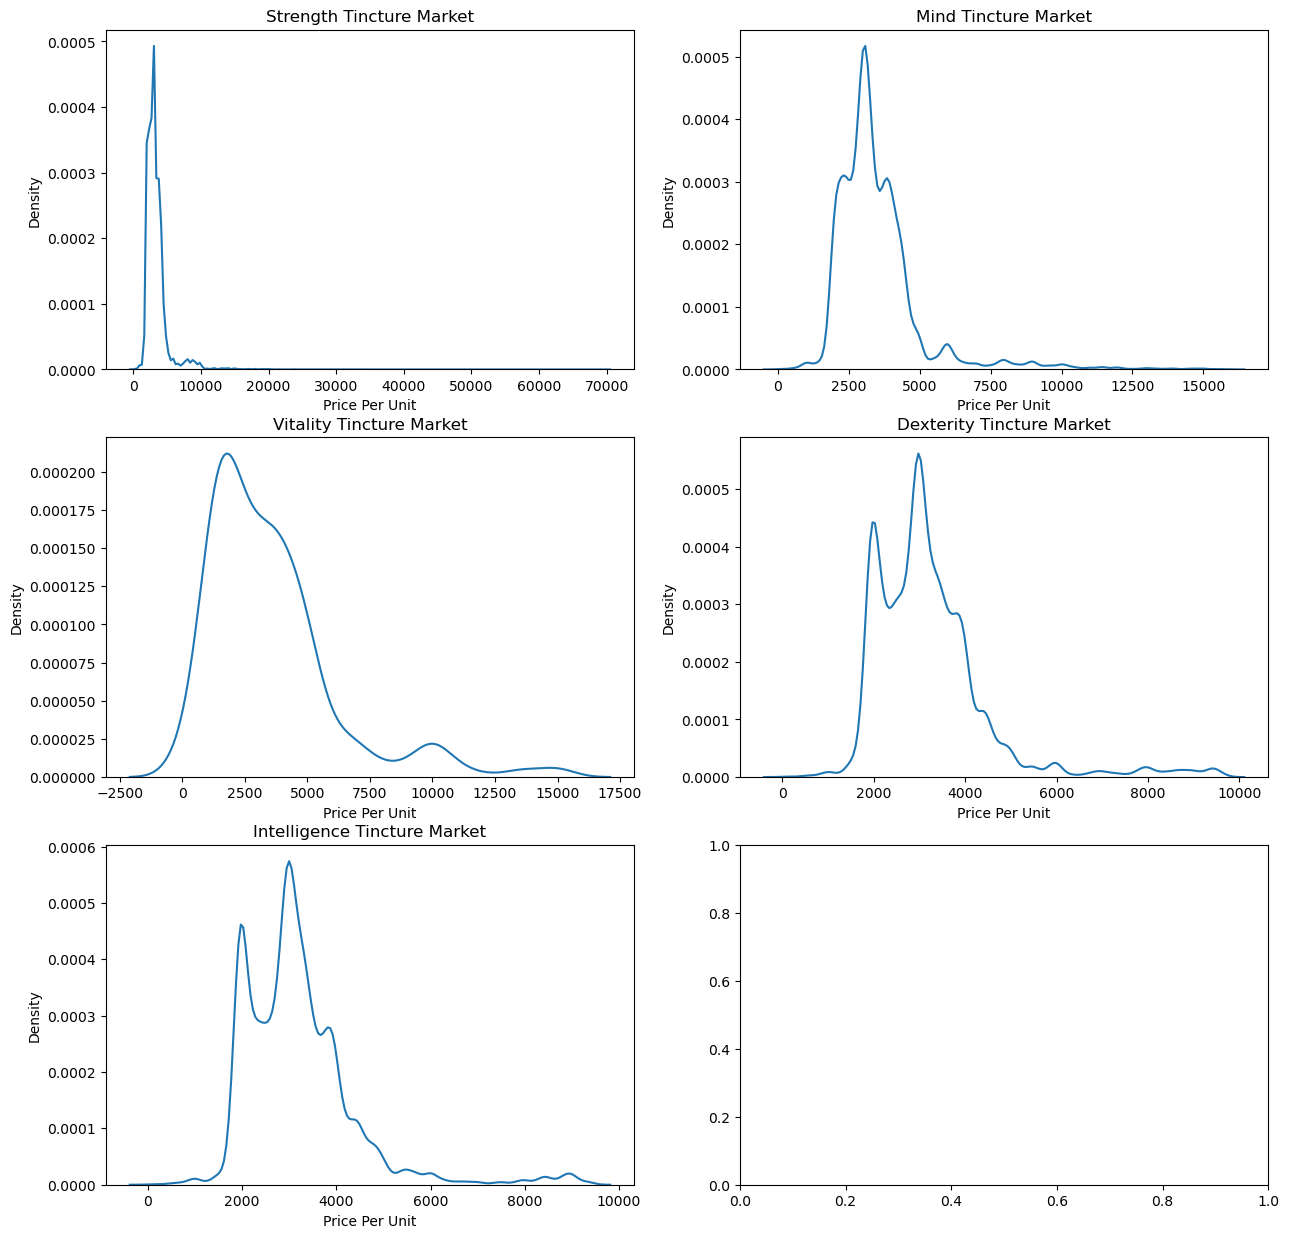

In [98]:
# Plot the normal distriution of the pricePerUnit feature for all the markets
fig, axs = plt.subplots(3, 2, figsize = (15, 15))

sns.kdeplot(strength_tincture_market["pricePerUnit"], ax = axs[0, 0])
axs[0, 0].set_title("Strength Tincture Market")
axs[0, 0].set_xlabel("Price Per Unit")
axs[0, 0].set_ylabel("Density")

sns.kdeplot(mind_tincture_market["pricePerUnit"], ax = axs[0, 1])
axs[0, 1].set_title("Mind Tincture Market")
axs[0, 1].set_xlabel("Price Per Unit")
axs[0, 1].set_ylabel("Density")

sns.kdeplot(vitality_tincture_market["pricePerUnit"], ax = axs[1, 0])
axs[1, 0].set_title("Vitality Tincture Market")
axs[1, 0].set_xlabel("Price Per Unit")
axs[1, 0].set_ylabel("Density")

sns.kdeplot(dexterity_tincture_market["pricePerUnit"], ax = axs[1, 1])
axs[1, 1].set_title("Dexterity Tincture Market")
axs[1, 1].set_xlabel("Price Per Unit")
axs[1, 1].set_ylabel("Density")

sns.kdeplot(intelligence_tincture_market["pricePerUnit"], ax = axs[2, 0])
axs[2, 0].set_title("Intelligence Tincture Market")
axs[2, 0].set_xlabel("Price Per Unit")
axs[2, 0].set_ylabel("Density")


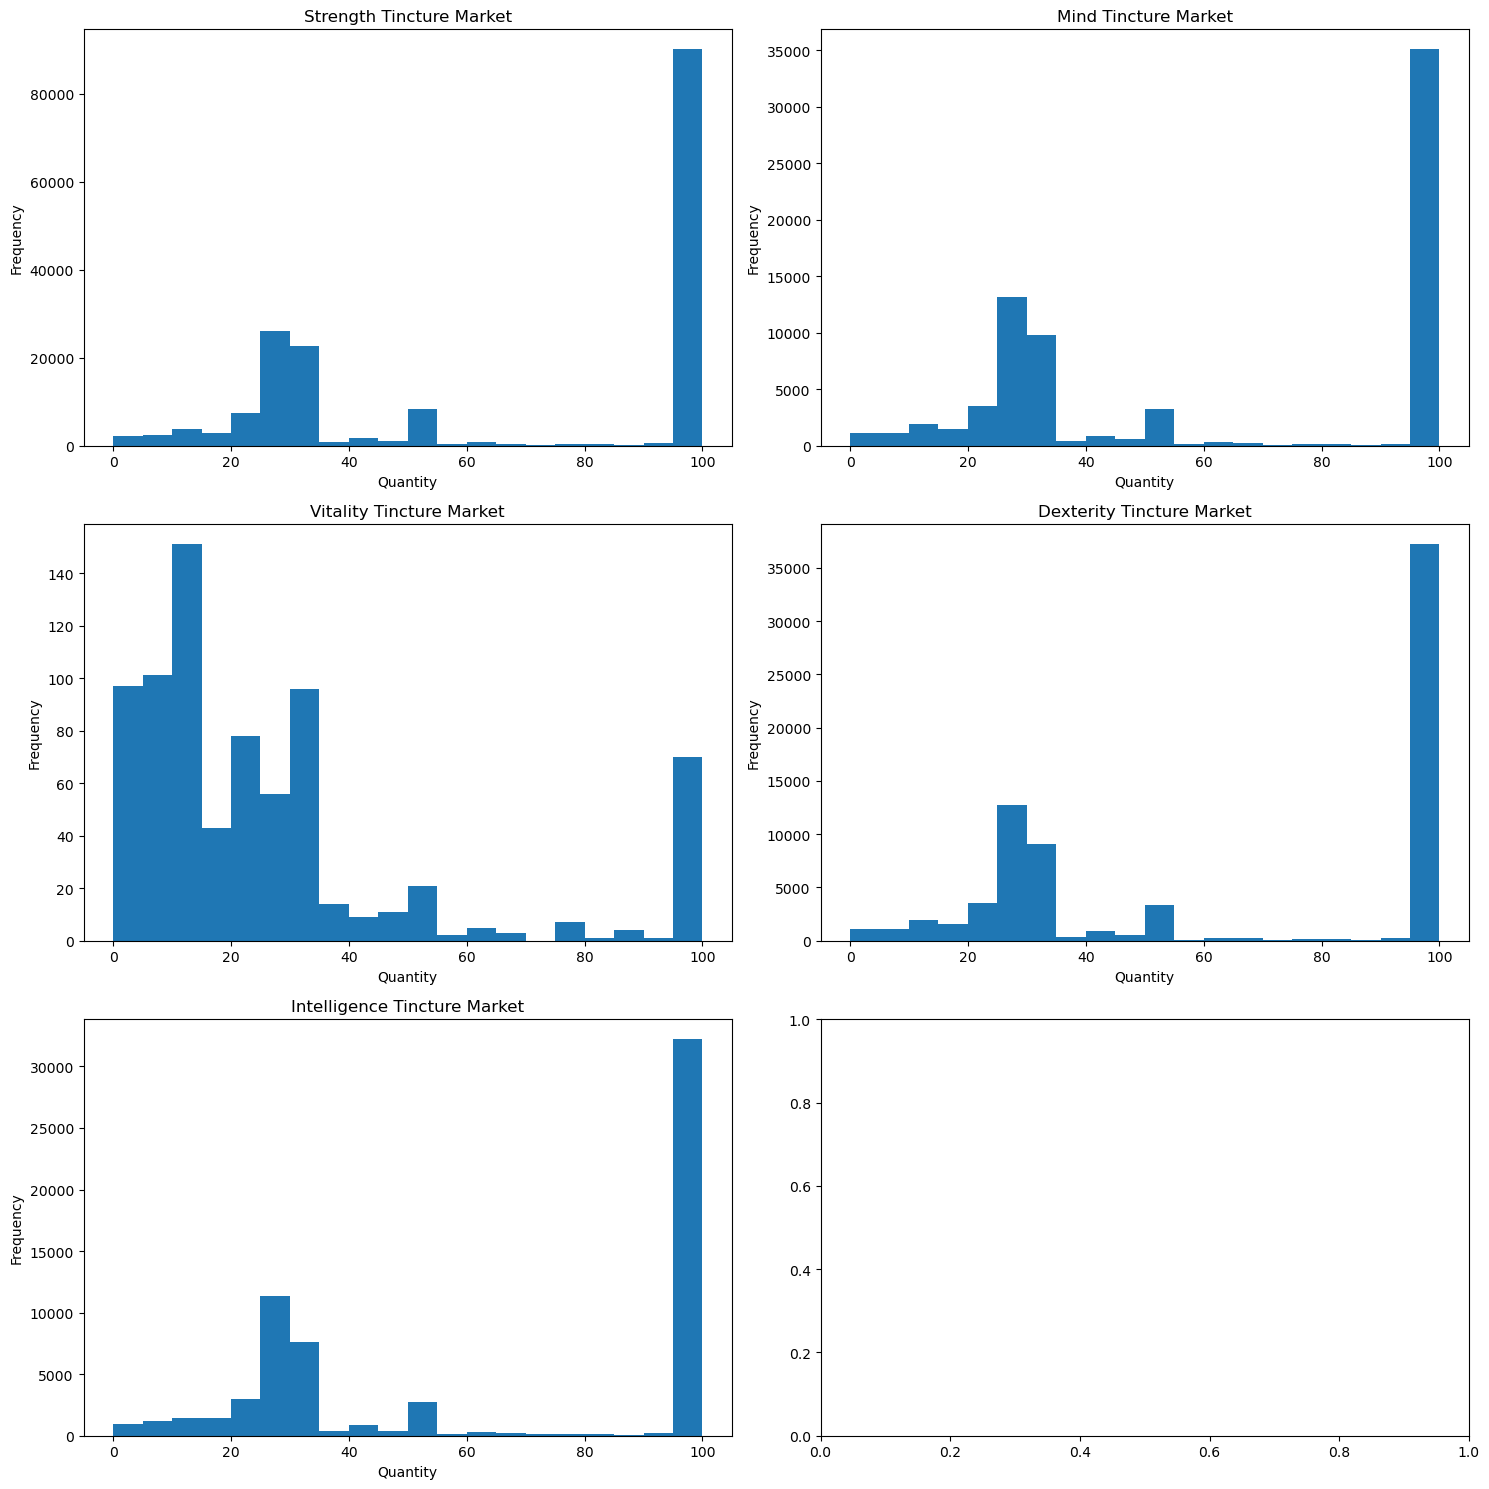

In [99]:
# We will plot multiple histograms of the quantity feature on a new figure
fig, axs = plt.subplots(3, 2, figsize = (15, 15))

axs[0, 0].hist(strength_tincture_market["quantity"], bins = 20, range = (0, 100))
axs[0, 0].set_title("Strength Tincture Market")
axs[0, 0].set_xlabel("Quantity")
axs[0, 0].set_ylabel("Frequency")

axs[0, 1].hist(mind_tincture_market["quantity"], bins = 20, range = (0, 100))
axs[0, 1].set_title("Mind Tincture Market")
axs[0, 1].set_xlabel("Quantity")
axs[0, 1].set_ylabel("Frequency")

axs[1, 0].hist(vitality_tincture_market["quantity"], bins = 20, range = (0, 100))
axs[1, 0].set_title("Vitality Tincture Market")
axs[1, 0].set_xlabel("Quantity")
axs[1, 0].set_ylabel("Frequency")

axs[1, 1].hist(dexterity_tincture_market["quantity"], bins = 20, range = (0, 100))
axs[1, 1].set_title("Dexterity Tincture Market")
axs[1, 1].set_xlabel("Quantity")
axs[1, 1].set_ylabel("Frequency")

axs[2, 0].hist(intelligence_tincture_market["quantity"], bins = 20, range = (0, 100))
axs[2, 0].set_title("Intelligence Tincture Market")
axs[2, 0].set_xlabel("Quantity")
axs[2, 0].set_ylabel("Frequency")

plt.tight_layout()
plt.show()




In [100]:
# We can adjust the data types of some columns in the data 
# This will be so we can use them in our correlation analysis
# We will convert the timestamp column to a datetime data type
strength_tincture_market["timestamp"] = pd.to_datetime(strength_tincture_market["timestamp"])
mind_tincture_market["timestamp"] = pd.to_datetime(mind_tincture_market["timestamp"])
vitality_tincture_market["timestamp"] = pd.to_datetime(vitality_tincture_market["timestamp"])
dexterity_tincture_market["timestamp"] = pd.to_datetime(dexterity_tincture_market["timestamp"])
intelligence_tincture_market["timestamp"] = pd.to_datetime(intelligence_tincture_market["timestamp"])

# # We will convert the hq column to a int data type
strength_tincture_market["hq"] = strength_tincture_market["hq"].astype(int)
mind_tincture_market["hq"] = mind_tincture_market["hq"].astype(int)
vitality_tincture_market["hq"] = vitality_tincture_market["hq"].astype(int)
dexterity_tincture_market["hq"] = dexterity_tincture_market["hq"].astype(int)
intelligence_tincture_market["hq"] = intelligence_tincture_market["hq"].astype(int)



C:\Users\eddie\AppData\Local\Temp\ipykernel_23136\4023980268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strength_tincture_market["timestamp"] = pd.to_datetime(strength_tincture_market["timestamp"])
C:\Users\eddie\AppData\Local\Temp\ipykernel_23136\4023980268.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strength_tincture_market["hq"] = strength_tincture_market["hq"].astype(int)


In [101]:
# print the data types of the columns in the data
print(strength_tincture_market.dtypes)
print(mind_tincture_market.dtypes)
print(vitality_tincture_market.dtypes)
print(dexterity_tincture_market.dtypes)
print(intelligence_tincture_market.dtypes)


hq                       int32
pricePerUnit             int64
quantity                 int64
buyerName               object
onMannequin               bool
timestamp       datetime64[ns]
worldName               object
worldID                  int64
Name                    object
itemID                   int64
year                     int64
month                    int64
day                      int64
hour                     int64
minute                   int64
second                   int64
day_of_week             object
week_of_year             int64
totalPrice               int64
z_score                float64
outlier                   bool
dtype: object
hq                       int32
pricePerUnit             int64
quantity                 int64
buyerName               object
onMannequin               bool
timestamp       datetime64[ns]
worldName               object
worldID                  int64
Name                    object
itemID                   int64
year                     

In [102]:
# Data Exploration remaigning steps
# - Check for correlation between features
# - Check for multicollinearity

d:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

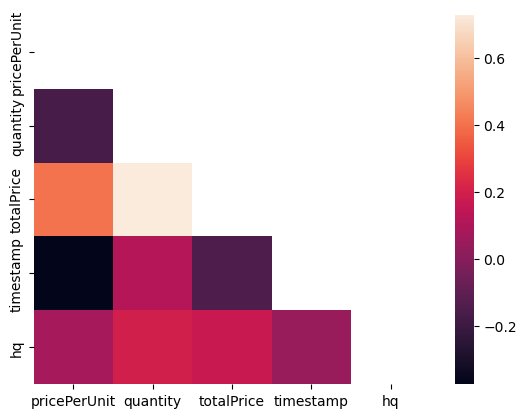

In [103]:
# - Check for correlation between features
# We will calculate the correlation matrix for the features in the data
# We will use the Pearson correlation coefficient to calculate the correlation between the features
# We will plot a heatmap of the correlation matrix


# We will calculate the correlation matrix for the pricePerUnit, quantity, hq, timestamp, and totalPrice features in the data
strength_tincture_market_correlation = strength_tincture_market[["pricePerUnit", "quantity", "totalPrice", "timestamp", "hq"]].corr()
mind_tincture_market_correlation = mind_tincture_market[["pricePerUnit", "quantity", "totalPrice", "timestamp", "hq"]].corr()
vitality_tincture_market_correlation = vitality_tincture_market[["pricePerUnit", "quantity", "totalPrice", "timestamp", "hq"]].corr()
dexterity_tincture_market_correlation = dexterity_tincture_market[["pricePerUnit", "quantity", "totalPrice", "timestamp", "hq"]].corr()
intelligence_tincture_market_correlation = intelligence_tincture_market[["pricePerUnit", "quantity", "totalPrice", "timestamp", "hq"]].corr()

# We will plot a heatmap of the correlation matrix for the strength tincture market data
sns.heatmap(strength_tincture_market_correlation, annot = True,mask=np.triu(np.ones_like(strength_tincture_market_correlation.corr(), dtype=bool)))


d:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

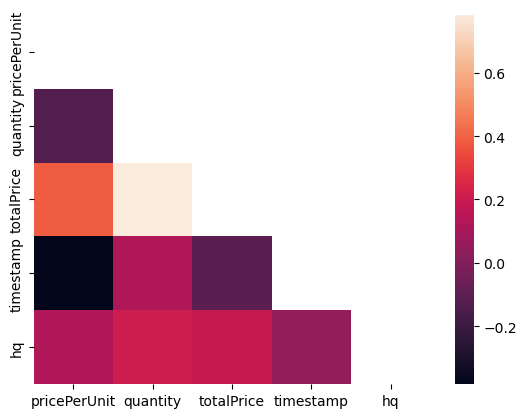

In [104]:
# We will plot a heatmap of the correlation matrix for the mind tincture market data
sns.heatmap(mind_tincture_market_correlation, annot = True,mask=np.triu(np.ones_like(mind_tincture_market_correlation.corr(), dtype=bool)))

d:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

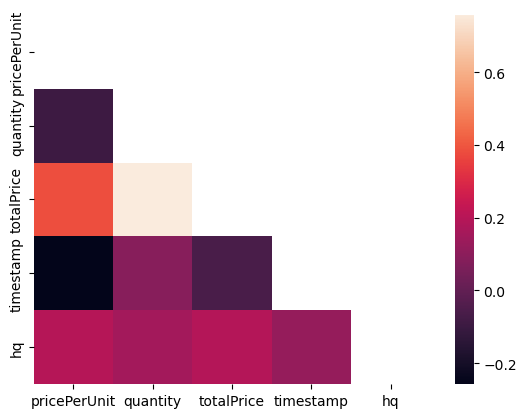

In [105]:
# We will plot a heatmap of the correlation matrix for the vitality tincture market data
sns.heatmap(vitality_tincture_market_correlation, annot = True,mask=np.triu(np.ones_like(vitality_tincture_market_correlation.corr(), dtype=bool)))

d:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

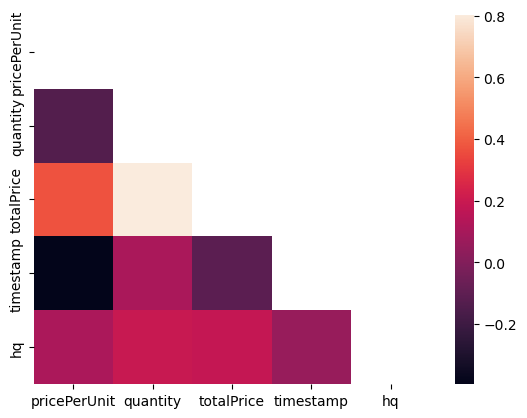

In [106]:
# We will plot a heatmap of the correlation matrix for the dexterity tincture market data
sns.heatmap(dexterity_tincture_market_correlation, annot = True,mask=np.triu(np.ones_like(dexterity_tincture_market_correlation.corr(), dtype=bool)))

d:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

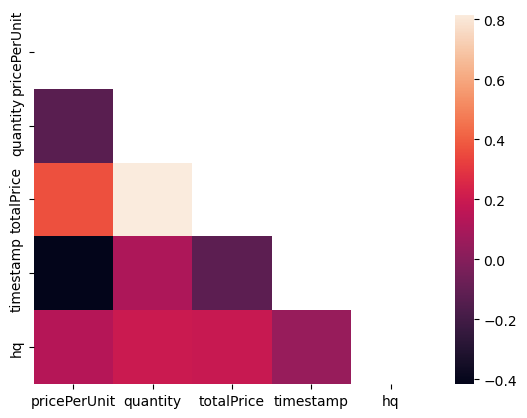

In [107]:
# We will plot a heatmap of the correlation matrix for the intelligence tincture market data
sns.heatmap(intelligence_tincture_market_correlation, annot = True,mask=np.triu(np.ones_like(intelligence_tincture_market_correlation.corr(), dtype=bool)))

In [108]:
# Check for multicollinearity
# We will check for multicollinearity between the features in the data
# We will use the variance inflation factor (VIF) to check for multicollinearity
# We will calculate the VIF for the features in the data
# We will consider any VIF greater than 10 to be an indication of multicollinearity

# We will calculate the VIF for the features in the strength tincture market data
X = strength_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [sm.OLS(X[col], X.drop(columns = [col])).fit().rsquared for col in X.columns]
vif


,features,VIF
0,const,0.981155
1,quantity,0.535192
2,totalPrice,0.530463
3,hq,0.040769


In [109]:
# We will calculate the VIF for the features in the mind tincture market data
X = mind_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [sm.OLS(X[col], X.drop(columns = [col])).fit().rsquared for col in X.columns]
vif

,features,VIF
0,const,0.977969
1,quantity,0.618265
2,totalPrice,0.615638
3,hq,0.043915


In [110]:
# We will calculate the VIF for the features in the vitality tincture market data
X = vitality_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [sm.OLS(X[col], X.drop(columns = [col])).fit().rsquared for col in X.columns]
vif

,features,VIF
0,const,0.922493
1,quantity,0.574112
2,totalPrice,0.580005
3,hq,0.036979


In [111]:
# We will calculate the VIF for the features in the dexterity tincture market data
X = dexterity_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [sm.OLS(X[col], X.drop(columns = [col])).fit().rsquared for col in X.columns]
vif

,features,VIF
0,const,0.979663
1,quantity,0.647560
2,totalPrice,0.645984
3,hq,0.038791


In [112]:
# We will calculate the VIF for the features in the intelligence tincture market data
X = intelligence_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [sm.OLS(X[col], X.drop(columns = [col])).fit().rsquared for col in X.columns]
vif

,features,VIF
0,const,0.980692
1,quantity,0.667626
2,totalPrice,0.666016
3,hq,0.041072


In [113]:
# There is no multicollinearity between the features in the data

In [114]:
# OLS Regression Analysis
# We will perform an OLS regression analysis on the data
# We will use the pricePerUnit as the target variable
# We will use the quantity, totalPrice,timestamp, and hq as the features
# We will use the statsmodels library to perform the regression analysis

# We will perform the regression analysis for the strength tincture market data
X = strength_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
y = strength_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricePerUnit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                 9.047e+04
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:45:38   Log-Likelihood:            -1.4701e+06
No. Observations:              173299   AIC:                         2.940e+06
Df Residuals:                  173295   BIC:                         2.940e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2627.2117     20.459    128.413      0.000    2587.112    2667.311
quantity     -50.8929      0.114   -446.727      0.000     -51.116     -50.670
totalPrice     0.0141   2.79e-05    503.829      0.000       0.014       0.014
hq          1150.0470     21.057     54.616      0.000    1108.776    1191.318
==============================================================================
Omnibus:                   263591.301   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        319126219.469
Skew:                           9.176   Prob(JB):                         0.00
Kurtosis:                     212.425   Cond. No.                     2.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

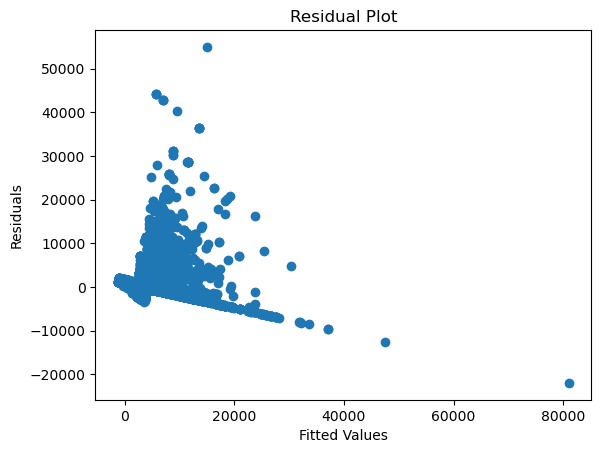

In [115]:
# Plot the residuals
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [116]:
# We will perform the regression analysis for the mind tincture market data
X = mind_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
y = mind_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricePerUnit   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                 4.672e+04
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:45:39   Log-Likelihood:            -6.0783e+05
No. Observations:               73726   AIC:                         1.216e+06
Df Residuals:                   73722   BIC:                         1.216e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2480.2263     22.855    108.519      0.000    2435.430    2525.023
quantity     -49.3439      0.150   -328.540      0.000     -49.638     -49.050
totalPrice     0.0135   3.74e-05    362.440      0.000       0.013       0.014
hq          1273.2442     23.603     53.945      0.000    1226.983    1319.505
==============================================================================
Omnibus:                    59044.159   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2063782.964
Skew:                           3.627   Prob(JB):                         0.00
Kurtosis:                      27.884   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

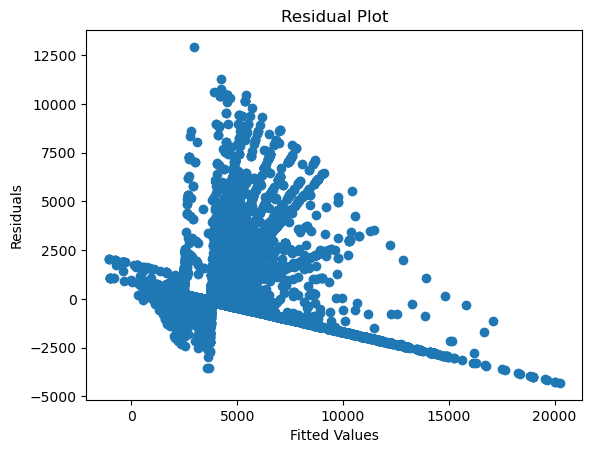

In [117]:
# Plot the residuals
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [118]:
# We will perform the regression analysis for the vitality tincture market data
X = vitality_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
y = vitality_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricePerUnit   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     267.1
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.26e-118
Time:                        12:45:39   Log-Likelihood:                -6886.2
No. Observations:                 770   AIC:                         1.378e+04
Df Residuals:                     766   BIC:                         1.380e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2411.6940    240.390     10.032      0.000    1939.793    2883.595
quantity     -87.0090      3.728    -23.341      0.000     -94.327     -79.691
totalPrice     0.0254      0.001     26.765      0.000       0.024       0.027
hq          1324.5918    252.506      5.246      0.000     828.905    1820.279
==============================================================================
Omnibus:                      297.484   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.194
Skew:                           1.733   Prob(JB):                    3.96e-299
Kurtosis:                       8.552   Cond. No.                     7.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

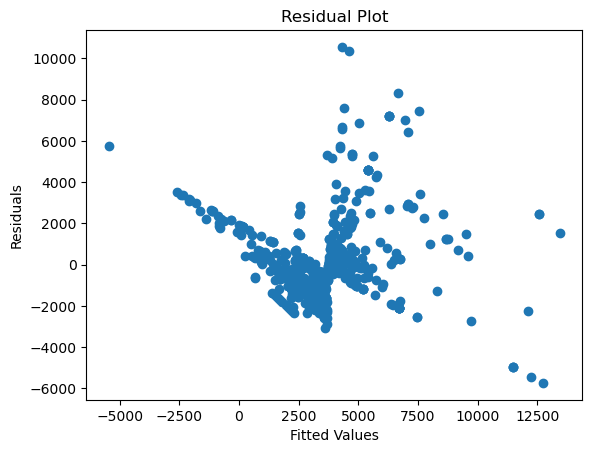

In [119]:
# Plot the residuals
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [120]:
# We will perform the regression analysis for the dexterity tincture market data
X = dexterity_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
y = dexterity_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricePerUnit   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                 5.358e+04
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:45:39   Log-Likelihood:            -5.9771e+05
No. Observations:               74692   AIC:                         1.195e+06
Df Residuals:                   74688   BIC:                         1.195e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2478.2996     18.551    133.595      0.000    2441.940    2514.659
quantity     -43.5249      0.122   -357.529      0.000     -43.764     -43.286
totalPrice     0.0130   3.33e-05    389.538      0.000       0.013       0.013
hq           955.6968     19.080     50.088      0.000     918.300     993.094
==============================================================================
Omnibus:                    45068.330   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           659824.339
Skew:                           2.658   Prob(JB):                         0.00
Kurtosis:                      16.556   Cond. No.                     2.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

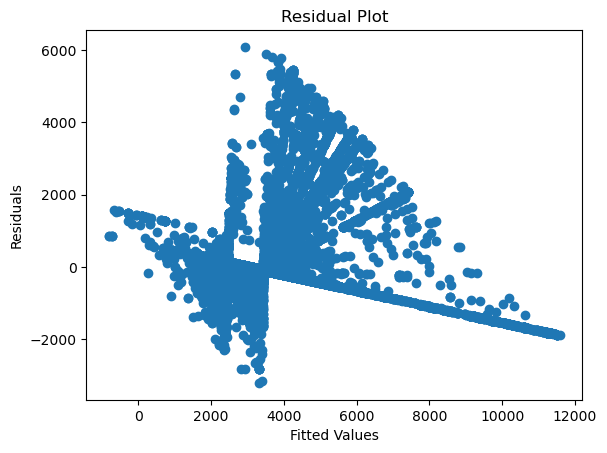

In [121]:
# Plot the residuals
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [122]:
# We will perform the regression analysis for the intelligence tincture market data
X = intelligence_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
y = intelligence_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricePerUnit   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                 4.945e+04
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:45:40   Log-Likelihood:            -5.1384e+05
No. Observations:               64938   AIC:                         1.028e+06
Df Residuals:                   64934   BIC:                         1.028e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2241.3749     18.669    120.061      0.000    2204.784    2277.965
quantity     -42.4108      0.123   -345.012      0.000     -42.652     -42.170
totalPrice     0.0128   3.42e-05    372.742      0.000       0.013       0.013
hq          1152.9205     19.227     59.963      0.000    1115.235    1190.606
==============================================================================
Omnibus:                    39161.981   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           618463.714
Skew:                           2.626   Prob(JB):                         0.00
Kurtosis:                      17.177   Cond. No.                     2.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

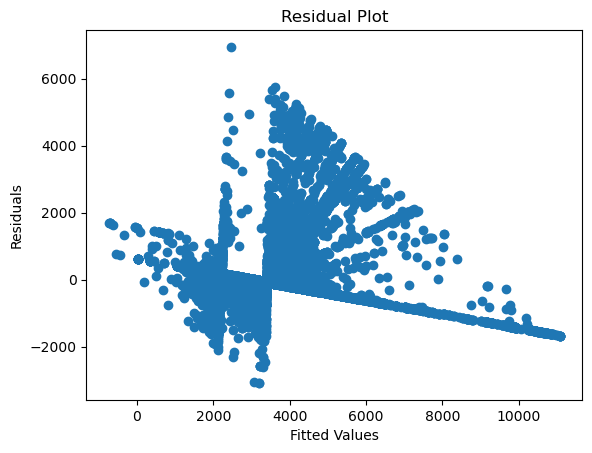

In [123]:
# Plot the residuals
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [124]:
# Model Building with sklearn insterad of statsmodels

# We will build a linear regression model to predict the pricePerUnit of the tinctures
# We will use the quantity, totalPrice, and hq as the features
# We will use the pricePerUnit as the target variable
# We will split the data into training and testing sets
# We will train the model on the training set
# We will evaluate the model on the testing set

# We will build the linear regression model for the strength tincture market data
X = strength_tincture_market[["quantity", "totalPrice", "hq"]]
y = strength_tincture_market["pricePerUnit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse



1517501.3848583016

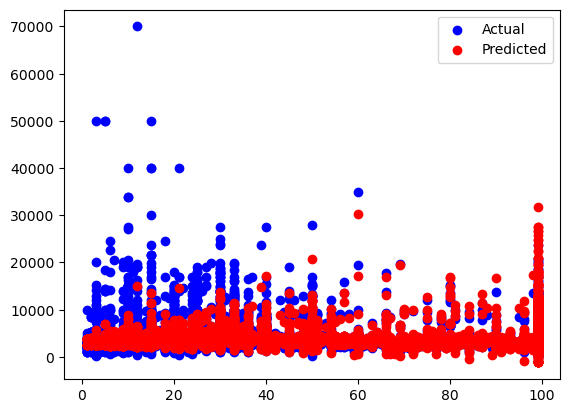

In [125]:
# Create a scatter plot of the actual values
plt.scatter(X_test["quantity"], y_test, color='blue', label='Actual')

# Create a scatter plot of the predicted values
plt.scatter(X_test["quantity"], y_pred, color='red', label='Predicted')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [126]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 553.375322204733
Mean Squared Error: 1517501.3848583016
Root Mean Squared Error: 1231.8690615720088
R-squared: 0.5931784858969055


In [127]:
# We will build the linear regression model for the mind tincture market data
X = mind_tincture_market[["quantity", "totalPrice", "hq"]]
y = mind_tincture_market["pricePerUnit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

830026.0127304496

In [128]:
# We will build the linear regression model for the vitality tincture market data
X = vitality_tincture_market[["quantity", "totalPrice", "hq"]]
y = vitality_tincture_market["pricePerUnit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

2340365.3395857248

In [129]:
# We will build the linear regression model for the dexterity tincture market data
X = dexterity_tincture_market[["quantity", "totalPrice", "hq"]]
y = dexterity_tincture_market["pricePerUnit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

487785.2218626722

In [130]:
# We will build the linear regression model for the intelligence tincture market data
X = intelligence_tincture_market[["quantity", "totalPrice", "hq"]]
y = intelligence_tincture_market["pricePerUnit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse


422735.32774958183

In [131]:
# lets try to engineer some features to see if we can improve the model
# We will engineer the following features:
# - day of the week
# - month
# - year
# - hour

# we will loop over all the dataframes and engineer the features
dataframes = [strength_tincture_market, mind_tincture_market, vitality_tincture_market, dexterity_tincture_market, intelligence_tincture_market]
for df in dataframes:
    df["day_of_week"] = df["timestamp"].dt.dayofweek
    df["month"] = df["timestamp"].dt.month
    df["year"] = df["timestamp"].dt.year
    df["hour"] = df["timestamp"].dt.hour


C:\Users\eddie\AppData\Local\Temp\ipykernel_23136\2975495676.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day_of_week"] = df["timestamp"].dt.dayofweek
C:\Users\eddie\AppData\Local\Temp\ipykernel_23136\2975495676.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df["timestamp"].dt.month
C:\Users\eddie\AppData\Local\Temp\ipykernel_23136\2975495676.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [132]:
# We will build the linear regression model for the strength tincture market data using the engineered features using statsmodels
X = strength_tincture_market[["quantity", "totalPrice", "hq", "day_of_week", "month", "year", "hour"]]
X = sm.add_constant(X)
y = strength_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricePerUnit   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                 4.244e+04
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:45:41   Log-Likelihood:            -1.4652e+06
No. Observations:              173299   AIC:                         2.930e+06
Df Residuals:                  173291   BIC:                         2.931e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.448e+06   2.58e+04     94.767      0.000     2.4e+06     2.5e+06
quantity      -45.9575      0.121   -378.686      0.000     -46.195     -45.720
totalPrice      0.0127   3.04e-05    418.615      0.000       0.013       0.013
hq           1256.6256     20.506     61.280      0.000    1216.434    1296.818
day_of_week    -3.8096      1.401     -2.718      0.007      -6.556      -1.063
month        -154.1304      1.601    -96.275      0.000    -157.268    -150.993
year        -1208.3826     12.766    -94.659      0.000   -1233.403   -1183.362
hour            1.7203      0.322      5.341      0.000       1.089       2.352
==============================================================================
Omnibus:                   271565.164   Durbin-Watson:                   0.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        387879299.262
Skew:                           9.713   Prob(JB):                         0.00
Kurtosis:                     233.954   Cond. No.                     2.45e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
# We will build the linear regression model for the mind tincture market data using the engineered features using statsmodels
X = mind_tincture_market[["quantity", "totalPrice", "hq", "day_of_week", "month", "year", "hour"]]
X = sm.add_constant(X)
y = mind_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricePerUnit   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                 2.267e+04
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:45:41   Log-Likelihood:            -6.0477e+05
No. Observations:               73726   AIC:                         1.210e+06
Df Residuals:                   73718   BIC:                         1.210e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.399e+06   3.13e+04     76.602      0.000    2.34e+06    2.46e+06
quantity      -43.7666      0.160   -272.841      0.000     -44.081     -43.452
totalPrice      0.0121   4.05e-05    297.825      0.000       0.012       0.012
hq           1364.0158     22.674     60.157      0.000    1319.574    1408.457
day_of_week    10.1883      1.682      6.059      0.000       6.892      13.484
month        -151.1287      1.960    -77.117      0.000    -154.970    -147.288
year        -1184.2277     15.476    -76.519      0.000   -1214.561   -1153.894
hour            0.7087      0.382      1.854      0.064      -0.041       1.458
==============================================================================
Omnibus:                    57643.194   Durbin-Watson:                   0.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1898637.091
Skew:                           3.515   Prob(JB):                         0.00
Kurtosis:                      26.846   Cond. No.                     2.47e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
# We will build the linear regression model for the vitality tincture market data using the engineered features using statsmodels
X = vitality_tincture_market[["quantity", "totalPrice", "hq", "day_of_week", "month", "year", "hour"]]
X = sm.add_constant(X)
y = vitality_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricePerUnit   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     124.5
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.16e-121
Time:                        12:45:41   Log-Likelihood:                -6868.2
No. Observations:                 770   AIC:                         1.375e+04
Df Residuals:                     762   BIC:                         1.379e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.242e+06    5.8e+05      5.586      0.000     2.1e+06    4.38e+06
quantity      -82.2722      3.746    -21.961      0.000     -89.626     -74.918
totalPrice      0.0242      0.001     25.335      0.000       0.022       0.026
hq           1492.7507    249.519      5.983      0.000    1002.925    1982.577
day_of_week    57.1239     31.279      1.826      0.068      -4.280     118.528
month        -172.9559     34.625     -4.995      0.000    -240.927    -104.985
year        -1600.8389    286.820     -5.581      0.000   -2163.889   -1037.789
hour           -8.7665      8.118     -1.080      0.281     -24.703       7.170
==============================================================================
Omnibus:                      264.042   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1170.034
Skew:                           1.527   Prob(JB):                    8.52e-255
Kurtosis:                       8.209   Cond. No.                     1.23e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
# We will build the linear regression model for the dexterity tincture market data using the engineered features using statsmodels
X = dexterity_tincture_market[["quantity", "totalPrice", "hq", "day_of_week", "month", "year", "hour"]]
X = sm.add_constant(X)
y = dexterity_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricePerUnit   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                 2.604e+04
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:45:41   Log-Likelihood:            -5.9444e+05
No. Observations:               74692   AIC:                         1.189e+06
Df Residuals:                   74684   BIC:                         1.189e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.924e+06   2.46e+04     78.087      0.000    1.88e+06    1.97e+06
quantity      -39.1084      0.128   -305.021      0.000     -39.360     -38.857
totalPrice      0.0117   3.57e-05    326.767      0.000       0.012       0.012
hq           1064.2040     18.313     58.111      0.000    1028.310    1100.098
day_of_week    -2.2744      1.298     -1.752      0.080      -4.819       0.271
month        -122.5275      1.519    -80.659      0.000    -125.505    -119.550
year         -949.1766     12.172    -77.981      0.000    -973.033    -925.320
hour            0.7873      0.296      2.661      0.008       0.207       1.367
==============================================================================
Omnibus:                    41641.068   Durbin-Watson:                   0.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           517420.928
Skew:                           2.443   Prob(JB):                         0.00
Kurtosis:                      14.933   Cond. No.                     2.33e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
# We will build the linear regression model for the intelligence tincture market data using the engineered features using statsmodels
X = intelligence_tincture_market[["quantity", "totalPrice", "hq", "day_of_week", "month", "year", "hour"]]
X = sm.add_constant(X)
y = intelligence_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricePerUnit   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                 2.385e+04
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:45:41   Log-Likelihood:            -5.1112e+05
No. Observations:               64938   AIC:                         1.022e+06
Df Residuals:                   64930   BIC:                         1.022e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.771e+06   2.47e+04     71.831      0.000    1.72e+06    1.82e+06
quantity      -38.1330      0.131   -291.070      0.000     -38.390     -37.876
totalPrice      0.0115    3.7e-05    310.140      0.000       0.011       0.012
hq           1233.2711     18.474     66.759      0.000    1197.063    1269.479
day_of_week    -4.3447      1.272     -3.417      0.001      -6.837      -1.853
month        -109.8370      1.515    -72.507      0.000    -112.806    -106.868
year         -873.7193     12.180    -71.736      0.000    -897.592    -849.847
hour            0.8263      0.292      2.829      0.005       0.254       1.399
==============================================================================
Omnibus:                    37059.954   Durbin-Watson:                   0.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           503241.381
Skew:                           2.487   Prob(JB):                         0.00
Kurtosis:                      15.698   Cond. No.                     2.35e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\eddie\AppData\Local\Temp\ipykernel_23136\406159151.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strength_tincture_market["forecast"] = forecast


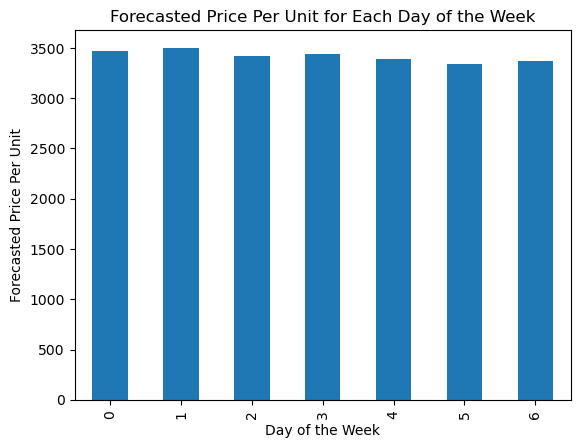

In [137]:
# lets plot the model to forecast the pricePerUnit on any given day of the week to maximaize profits
# We will plot the forecasted pricePerUnit for each day of the week
# We will use the linear regression model to forecast the pricePerUnit
# We will use the quantity, totalPrice, hq, day_of_week, month, year, and hour as the features
# We will use the pricePerUnit as the target variable
# We will use the statsmodels library to perform the regression analysis

# We will plot the forecasted pricePerUnit for each day of the week for the strength tincture market data
X = strength_tincture_market[["quantity", "totalPrice", "hq", "day_of_week", "month", "year", "hour"]]
X = sm.add_constant(X)
y = strength_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
forecast = model.predict(X)
strength_tincture_market["forecast"] = forecast
strength_tincture_market.groupby("day_of_week")["forecast"].mean().plot(kind = "bar")
plt.xlabel("Day of the Week")
plt.ylabel("Forecasted Price Per Unit")
plt.title("Forecasted Price Per Unit for Each Day of the Week")
plt.show()




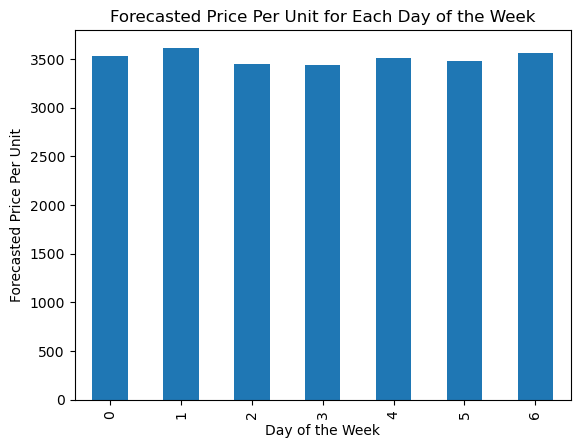

In [138]:
# We will plot the forecasted pricePerUnit for each day of the week for the mind tincture market data
X = mind_tincture_market[["quantity", "totalPrice", "hq", "day_of_week", "month", "year", "hour"]]
X = sm.add_constant(X)
y = mind_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
forecast = model.predict(X)
mind_tincture_market["forecast"] = forecast
mind_tincture_market.groupby("day_of_week")["forecast"].mean().plot(kind = "bar")
plt.xlabel("Day of the Week")
plt.ylabel("Forecasted Price Per Unit")
plt.title("Forecasted Price Per Unit for Each Day of the Week")
plt.show()

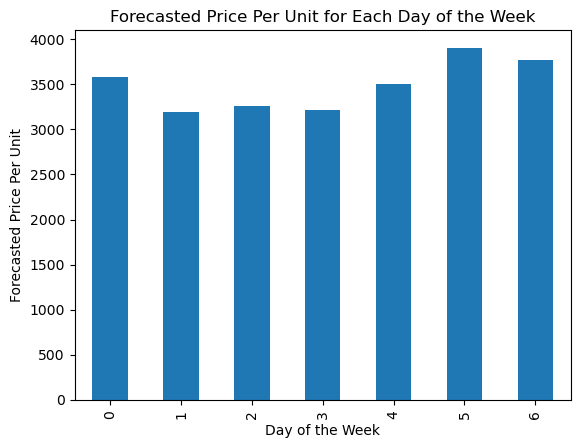

In [139]:
# We will plot the forecasted pricePerUnit for each day of the week for the vitality tincture market data
X = vitality_tincture_market[["quantity", "totalPrice", "hq", "day_of_week", "month", "year", "hour"]]
X = sm.add_constant(X)
y = vitality_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
forecast = model.predict(X)
vitality_tincture_market["forecast"] = forecast
vitality_tincture_market.groupby("day_of_week")["forecast"].mean().plot(kind = "bar")
plt.xlabel("Day of the Week")
plt.ylabel("Forecasted Price Per Unit")
plt.title("Forecasted Price Per Unit for Each Day of the Week")
plt.show()

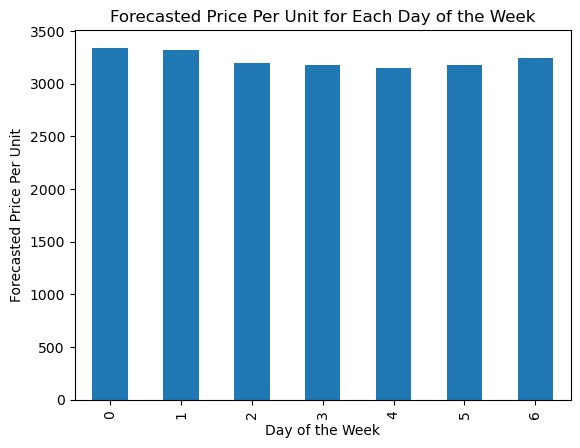

In [140]:
# We will plot the forecasted pricePerUnit for each day of the week for the dexterity tincture market data
X = dexterity_tincture_market[["quantity", "totalPrice", "hq", "day_of_week", "month", "year", "hour"]]
X = sm.add_constant(X)
y = dexterity_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
forecast = model.predict(X)
dexterity_tincture_market["forecast"] = forecast
dexterity_tincture_market.groupby("day_of_week")["forecast"].mean().plot(kind = "bar")
plt.xlabel("Day of the Week")
plt.ylabel("Forecasted Price Per Unit")
plt.title("Forecasted Price Per Unit for Each Day of the Week")
plt.show()


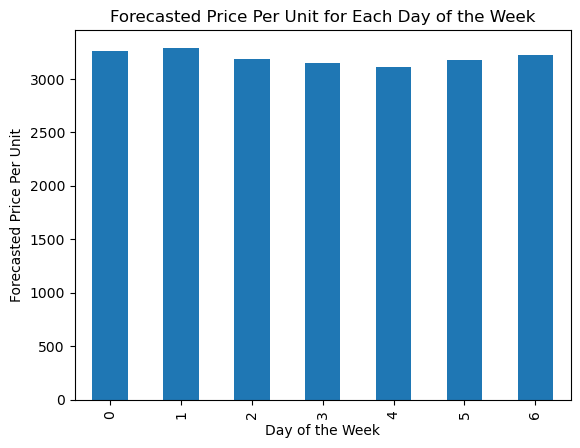

In [141]:
# We will plot the forecasted pricePerUnit for each day of the week for the intelligence tincture market data
X = intelligence_tincture_market[["quantity", "totalPrice", "hq", "day_of_week", "month", "year", "hour"]]
X = sm.add_constant(X)
y = intelligence_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
forecast = model.predict(X)
intelligence_tincture_market["forecast"] = forecast
intelligence_tincture_market.groupby("day_of_week")["forecast"].mean().plot(kind = "bar")
plt.xlabel("Day of the Week")
plt.ylabel("Forecasted Price Per Unit")
plt.title("Forecasted Price Per Unit for Each Day of the Week")
plt.show()